In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
import datetime

In [2]:
def readgrid(path="/work/bb1070/b381019/Input/",name="domain3_DOM02.nc"):
        """
        read Icon grid via xarray, converts radians to degrees
        arguments 
            str(path): path to gridfile
            str(name): name of gridfile
        """
        
        rad2deg = 180.0/np.pi
        deg2rad = np.pi/180
        ds_grid = ( xr.open_dataset(path+name))
        # convert grid from radians to degrees
        ds_grid['clon'] = ds_grid['clon']*rad2deg
        ds_grid['clat'] = ds_grid['clat']*rad2deg
        ds_grid['clon_vertices'] = ds_grid['clon_vertices']*rad2deg
        ds_grid['clat_vertices'] = ds_grid['clat_vertices']*rad2deg
        return ds_grid

In [4]:
#read the grid
grid = readgrid(path="/work/bb1070/b381019/Output/Output_1911/inwp_gscp6/aci_cold6/" ,name='grid.nc')

#read the data
data = xr.open_dataset('/work/bb1070/b381019/Output/Output_1911/inwp_gscp6/aci_cold6/icon-art-LAM-THUNDER-aero_DOM01_ML_0001.nc')
#look at data, decide which variable to plot at which height and time
data

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 65, height_2: 66, height_3: 66, ncells: 26864, time: 2)
Coordinates:
  * time           (time) float64 2.016e+07 2.016e+07
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 62.0 63.0 64.0 65.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0 66.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0 66.0
Dimensions without coordinates: bnds, ncells
Data variables:
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    pollbetu       (time, height, ncells) float32 ...
    spp_pollbetu   (time, height, ncells) float32 ...
    spp_pollbetu0  (time, height, ncells) float32 ...
    clc            (time, height, ncells) float32 ...
    tot_qv_dia     (time, height, ncells) float32 ...
    tot_qc_dia     (time, height, ncells) float32 ...
    tot_qi_dia     (time, height, ncells) float32 ...
    w              (time, height_2, ncells) float32 ...
    qv             (time, height, ncells) float32 ...
    qc             (time, height, ncells) float32 ...
    qi             (time, height, ncells) float32 ...
    qr             (time, height, ncells) float32 ...
    qs             (time, height, ncells) float32 ...
    tke            (time, height_2, ncells) float32 ...
    u              (time, height, ncells) float32 ...
    v              (time, height, ncells) float32 ...
    rh             (time, height, ncells) float32 ...
    temp           (time, height, ncells) float32 ...
    pres           (time, height, ncells) float32 ...
    clct           (time, ncells) float32 ...
    tot_prec       (time, ncells) float32 ...
    pres_msl       (time, ncells) float32 ...
    z_ifc          (height_3, ncells) float32 ...
    qnc            (time, height, ncells) float32 ...
    qnr            (time, height, ncells) float32 ...
    qns            (time, height, ncells) float32 ...
    qng            (time, height, ncells) float32 ...
    qnh            (time, height, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    grid_file_uri:        private
    uuidOfHGrid:          e41c73a7-d02b-f3bd-b76d-402758be2580
    uuidOfVGrid:          390dac9d-8b63-5b85-f729-5c97ce052a00
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               Unknown@Unknown
    history:              /mnt/lustre02/work/bb1070/b381019/Output/./icon.exe...
    references:           see MPIM/DWD publications
    comment:              Luca Reißig (b381019) on m11493 (Linux 2.6.32-754.3...

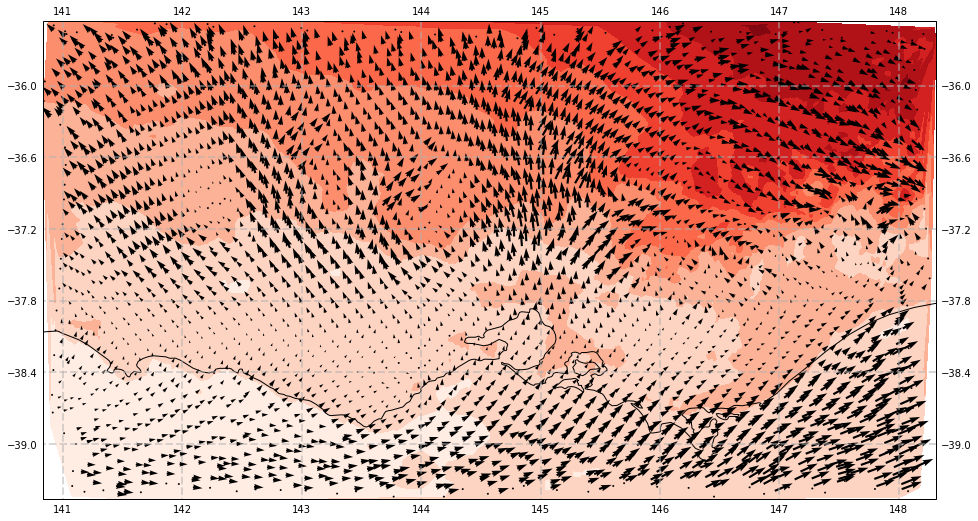

In [21]:
plt.figure(figsize=(16,9),facecolor='white')

#include geographical features
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('10m')

ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2,draw_labels=True, alpha=0.5, linestyle='--')

#overlay temperature
plt.tricontourf(grid['clon'].values,grid['clat'].values
                      ,data['temp'].isel(height=-1,time=0).values,cmap='Reds')

#in this example, plot wind arrows at ground level at timestep 0
#to avoid overcrowding the plot plot only every n-th gridpoint
n=8
plt.quiver(grid['clon'].values[::n],grid['clat'].values[::n]
                      ,data['u'].isel(height=-1,time=0).values[::n]
                    ,data['v'].isel(height=-1,time=0).values[::n])



In [10]:
?plt.quiver